##**Machine Learning for Smart Health Systems: Project-2**

**Aim:** Develop a heart beat classification model, train it on mitbih train and evaluate model on mitbihtest data, both datasets are available on the google drive.

**References:**

* Machine Learning for Smart Health_ Lecture 2

* The dataset has been processed and prepared and is available at
https://drive.google.com/drive/folders/159WV3PR3x5vpWwbbsjCXK5k4tgaNn0Ut?usp=sharing

* MLSH-L2-P3.ipynb notebook from Lecture-2

* https://www.mathworks.com/matlabcentral/fileexchange/66623-ecg-preprocessing-segmentation-and-obtaining-the-mean-p-qrs-t-fragment

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

###Data loading and splitting for Models

In [4]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import required machine learning modules
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score
from warnings import simplefilter
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

###Test data: mitbih_test.csv

In [3]:
# Import the mitbih_test dataset from a csv file
mitbih_test = pd.read_csv('/content/mitbih_test.csv',header=None)
mitbih_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Import the mitbih_test dataset from a csv file
mitbih_test = pd.read_csv('/content/mitbih_test.csv',names = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                       'x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
                       'x21','x22','x23','x24','x25','x26','x27','x28','x29','x30',
                       'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
                       'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50',
                       'x51','x52','x53','x54','x55','x56','x57','x58','x59','x60',
                       'x61','x62','x63','x64','x65','x66','x67','x68','x69','x70',
                       'x71','x72','x73','x74','x75','x76','x77','x78','x79','x80',
                       'x81','x82','x83','x84','x85','x86','x87','x88','x89','x90',
                       'x91','x92','x93','x94','x95','x96','x97','x98','x99','x100',
                       'x101','x102','x103','x104','x105','x106','x107','x108','x109','x110',
                       'x111','x112','x113','x114','x115','x116','x117','x118','x119','x120',
                       'x121','x122','x123','x124','x125','x126','x127','x128','x129','x130',
                       'x131','x132','x133','x134','x135','x136','x137','x138','x139','x140',
                       'x141','x142','x143','x144','x145','x146','x147','x148','x149','x150',
                       'x151','x152','x153','x154','x155','x156','x157','x158','x159','x160',
                       'x161','x162','x163','x164','x165','x166','x167','x168','x169','x170',
                       'x171','x172','x173','x174','x175','x176','x177','x178','x179','x180',
                       'x181','x182','x183','x184','x185','x186','x187','Label'])
mitbih_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,Label
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Inspect all features
mitbih_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, x1 to Label
dtypes: float64(188)
memory usage: 31.4 MB


In [6]:
# Check for null values
mitbih_test.isna().sum()

x1       0
x2       0
x3       0
x4       0
x5       0
        ..
x184     0
x185     0
x186     0
x187     0
Label    0
Length: 188, dtype: int64

In [7]:
# Separte out target and input features
X_test = mitbih_test.drop(['Label'], axis=1)
y_test= mitbih_test.Label

    x1        x2       x3   x4        x5  ...  x183  x184  x185  x186  x187
0  1.0  0.758264  0.11157  0.0  0.080579  ...   0.0   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


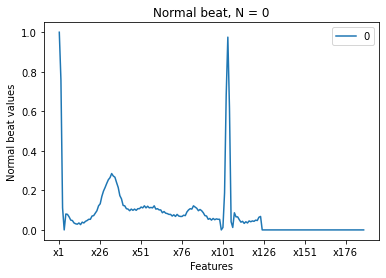

In [8]:
#Ploting Normal beat. Normal beat represented as N and in the dataset the value of N = 0
print(X_test[0:1])
df = X_test[0:1]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Normal beat values')
plt.title('Normal beat, N = 0')
plt.show()


        x1        x2        x3        x4  ...  x184  x185  x186  x187
18119  1.0  0.746556  0.088154  0.035813  ...   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


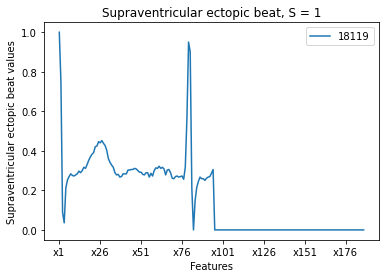

In [9]:
#Ploting Supraventricular ectopic beat. Supraventricular ectopic beat represented as S and in the dataset the value of S = 1
print(X_test[18119:18120])
df = X_test[18119:18120]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Supraventricular ectopic beat values')
plt.title('Supraventricular ectopic beat, S = 1')
plt.show()

        x1        x2        x3        x4  ...  x184  x185  x186  x187
18675  1.0  0.901786  0.760714  0.610714  ...   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


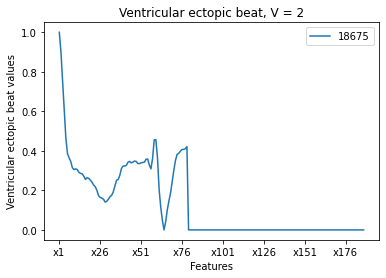

In [10]:
#Ploting Ventricular ectopic beat. Ventricular ectopic beat represented as V and in the dataset the value of V = 2
print(X_test[18675:18676])
df = X_test[18675:18676]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Ventricular ectopic beat values')
plt.title('Ventricular ectopic beat, V = 2')
plt.show()

        x1        x2        x3        x4   x5  ...  x183  x184  x185  x186  x187
20123  1.0  0.768025  0.420063  0.158307  0.0  ...   0.0   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


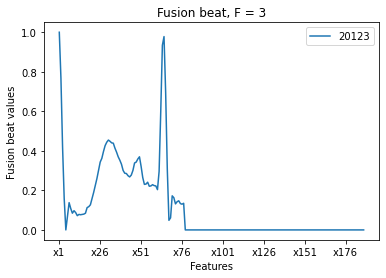

In [11]:
#Ploting Fusion beat. Fusion beat represented as F and in the dataset the value of F = 3
print(X_test[20123:20124])
df = X_test[20123:20124]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Fusion beat values')
plt.title('Fusion beat, F = 3')
plt.show()

             x1        x2        x3        x4  ...  x184  x185  x186  x187
20285  0.736457  0.644217  0.534407  0.418741  ...   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


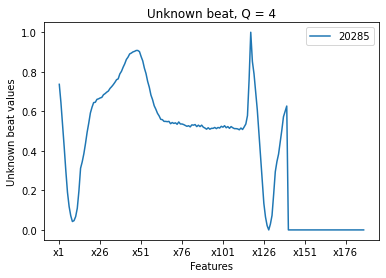

In [12]:
#Ploting Unknown beat. Unknown beat represented as Q and in the dataset the value of Q = 4
print(X_test[20285:20286])
df = X_test[20285:20286]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Unknown beat values')
plt.title('Unknown beat, Q = 4')
plt.show()

In [13]:
#Inspect the distribution of the target variable: Label
mitbih_test.Label.value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Label, dtype: int64

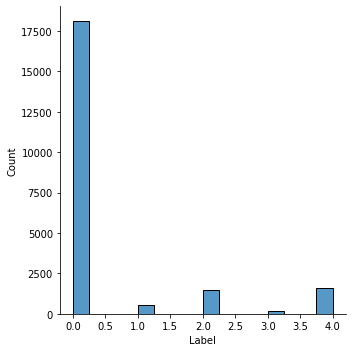

In [14]:
#Plot distribution of Lable classes
sns.displot(mitbih_test['Label'])

**Comment:** Total mitbih_test samples = 21892

MIT-BIH Arrhythmia Dataset brief description: 

Number of Categories = 5

Number of Samples = 109446

Sampling Frequency = 125Hz

Data Source = Physionet's MIT-BIH Arrhythmia Dataset

Classes = ['N' : '0', 'S' : '1', 'V' : '2', 'F' : '3', 'Q' : '4']

N = Normal beat

S = Supraventricular ectopic beat

V = ventricular ectopic beat

F = Fusion beat

Q = Unknown beat

###Train data: mitbih_train.csv

In [15]:
# Import the mitbih_train dataset from a csv file
mitbih_train = pd.read_csv('/content/mitbih_train.csv',header=None)
mitbih_train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.621667,0.636667,0.651667,0.665000,0.681667,0.700000,0.711667,0.735000,0.763333,0.785000,0.810000,0.835000,0.856667,0.876667,0.880000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,0.097959,0.048980,0.036735,0.053061,0.053061,0.097959,0.183673,0.269388,0.351020,0.408163,0.436735,0.469388,0.481633,0.518367,0.530612,0.534694,0.555102,0.591837,0.628571,0.632653,0.624490,0.616327,0.616327,0.608163,0.608163,0.620408,0.628571,0.624490,0.632653,0.644898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,0.101266,0.101266,0.088608,0.081013,0.073418,0.065823,0.065823,0.053165,0.048101,0.037975,0.035443,0.025316,0.020253,0.020253,0.017722,0.002532,0.005063,0.007595,0.000000,0.010127,0.010127,0.015190,0.035443,0.040506,0.050633,0.058228,0.070886,0.086076,0.098734,0.106329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,0.370800,0.287370,0.236385,0.324450,0.403244,0.409038,0.407880,0.390498,0.390498,0.419467,0.443801,0.487833,0.544612,0.574739,0.582851,0.592121,0.601390,0.611819,0.624565,0.634994,0.650058,0.661645,0.677868,0.691773,0.712630,0.726535,0.741599,0.749710,0.761298,0.763615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [16]:
# Import the mitbih_train dataset from a csv file
mitbih_train = pd.read_csv('/content/mitbih_train.csv',names = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                       'x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
                       'x21','x22','x23','x24','x25','x26','x27','x28','x29','x30',
                       'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
                       'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50',
                       'x51','x52','x53','x54','x55','x56','x57','x58','x59','x60',
                       'x61','x62','x63','x64','x65','x66','x67','x68','x69','x70',
                       'x71','x72','x73','x74','x75','x76','x77','x78','x79','x80',
                       'x81','x82','x83','x84','x85','x86','x87','x88','x89','x90',
                       'x91','x92','x93','x94','x95','x96','x97','x98','x99','x100',
                       'x101','x102','x103','x104','x105','x106','x107','x108','x109','x110',
                       'x111','x112','x113','x114','x115','x116','x117','x118','x119','x120',
                       'x121','x122','x123','x124','x125','x126','x127','x128','x129','x130',
                       'x131','x132','x133','x134','x135','x136','x137','x138','x139','x140',
                       'x141','x142','x143','x144','x145','x146','x147','x148','x149','x150',
                       'x151','x152','x153','x154','x155','x156','x157','x158','x159','x160',
                       'x161','x162','x163','x164','x165','x166','x167','x168','x169','x170',
                       'x171','x172','x173','x174','x175','x176','x177','x178','x179','x180',
                       'x181','x182','x183','x184','x185','x186','x187','Label'])
mitbih_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481

In [17]:
#Inspect all features
mitbih_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, x1 to Label
dtypes: float64(188)
memory usage: 125.6 MB


In [18]:
# Check for null values
mitbih_train.isna().sum()

x1       0
x2       0
x3       0
x4       0
x5       0
        ..
x184     0
x185     0
x186     0
x187     0
Label    0
Length: 188, dtype: int64

In [19]:
# Separte out target and input features
X_train = mitbih_train.drop(['Label'], axis=1)
y_train= mitbih_train.Label

         x1        x2        x3        x4  ...  x184  x185  x186  x187
0  0.977941  0.926471  0.681373  0.245098  ...   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


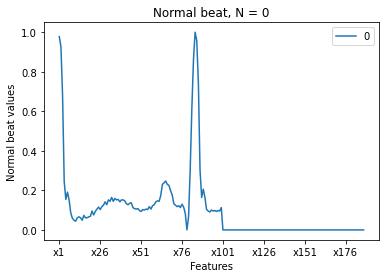

In [20]:
#Ploting Normal beat. Normal beat represented as N and in the dataset the value of N = 0
print(X_train[0:1])
df = X_train[0:1]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Normal beat values')
plt.title('Normal beat, N = 0')
plt.show()

        x1        x2        x3        x4  ...  x184  x185  x186  x187
72481  1.0  0.897638  0.326772  0.074803  ...   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


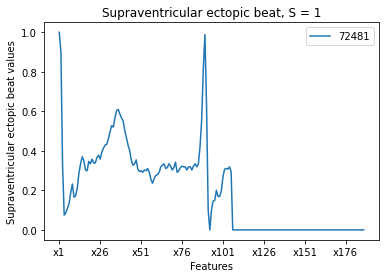

In [21]:
#Ploting Supraventricular ectopic beat. Supraventricular ectopic beat represented as S and in the dataset the value of S = 1
print(X_train[72481:72482])
df = X_train[72481:72482]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Supraventricular ectopic beat values')
plt.title('Supraventricular ectopic beat, S = 1')
plt.show()

             x1   x2        x3        x4  ...  x184  x185  x186  x187
74700  0.004317  0.0  0.054676  0.152518  ...   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


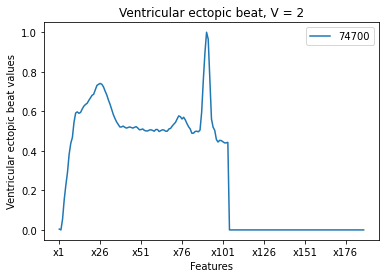

In [22]:
#Ploting Ventricular ectopic beat. Ventricular ectopic beat represented as V and in the dataset the value of V = 2
print(X_train[74700:74701])
df = X_train[74700:74701]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Ventricular ectopic beat values')
plt.title('Ventricular ectopic beat, V = 2')
plt.show()

             x1        x2   x3        x4  ...  x184  x185  x186  x187
80503  0.875657  0.975482  1.0  0.644483  ...   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


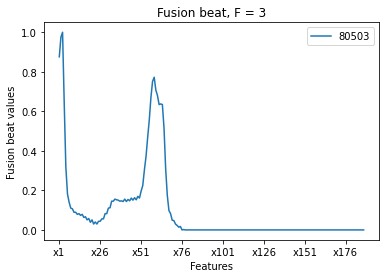

In [23]:
#Ploting Fusion beat. Fusion beat represented as F and in the dataset the value of F = 3
print(X_train[80503:80504])
df = X_train[80503:80504]
df_transpose = df.transpose()
print(df_transpose.plot()) 
plt.xlabel('Features')
plt.ylabel('Fusion beat values')
plt.title('Fusion beat, F = 3')
plt.show()

        x1       x2        x3        x4        x5  ...  x183  x184  x185  x186  x187
81126  1.0  0.93617  0.878598  0.813517  0.727159  ...   0.0   0.0   0.0   0.0   0.0

[1 rows x 187 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


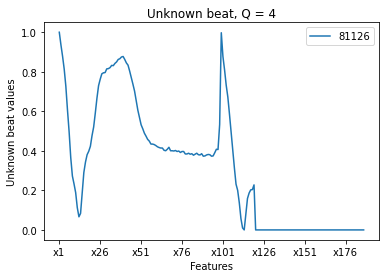

In [24]:
#Ploting Unknown beat. Unknown beat represented as Q and in the dataset the value of Q = 4
print(X_train[81126:81127])
df = X_train[81126:81127]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Features')
plt.ylabel('Unknown beat values')
plt.title('Unknown beat, Q = 4')
plt.show()

In [25]:
#Inspect the distribution of the target variable: Label
mitbih_train.Label.value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Label, dtype: int64

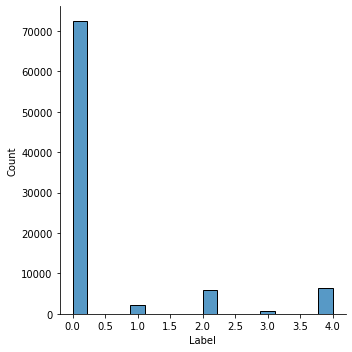

In [26]:
#Plot the distribution of target variable: Label
sns.displot(mitbih_train['Label'])

**Comment:** Total mitbih_train samples = 87554 

MIT-BIH Arrhythmia Dataset brief description: 

Number of Categories = 5

Number of Samples = 109446

Sampling Frequency = 125Hz

Data Source = Physionet's MIT-BIH Arrhythmia Dataset

Classes = ['N' : '0', 'S' : '1', 'V' : '2', 'F' : '3', 'Q' : '4']

N = Normal beat

S = Supraventricular ectopic beat

V = ventricular ectopic beat

F = Fusion beat

Q = Unknown beat


###Supervised Classification models (Without Data Balancing)

In [28]:
#Creating model results evaluation function
def model_results(model):
  #fitting the model
  model.fit(X_train,y_train)
  #predicting
  y_predicted= model.predict(X_test)
  #results evaluation
  print(classification_report(y_test,y_predicted))
  plot_confusion_matrix(model,X_test,y_test)

####1.Logistic Regression model

In [29]:
# Instatiate a linear model and check cross-validation performance
simplefilter("ignore")
model1 = LogisticRegression()
cv_score = cross_val_score(model1, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.9089715  0.91439666 0.91405402 0.91039918 0.91496288]
0.9125568495560318


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18118
         1.0       0.84      0.35      0.50       556
         2.0       0.64      0.33      0.44      1448
         3.0       0.54      0.29      0.38       162
         4.0       0.95      0.87      0.91      1608

    accuracy                           0.91     21892
   macro avg       0.78      0.57      0.64     21892
weighted avg       0.90      0.91      0.90     21892



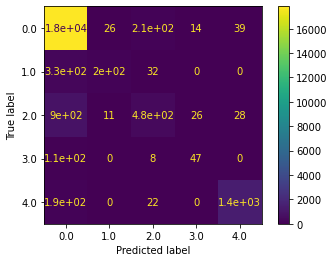

In [30]:
#Logistic regression model results
model_results(model1)

####2.Support Vector machine model

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892



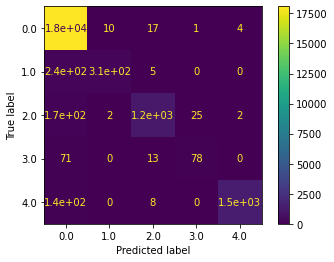

In [32]:
#Instatiate support vector machine model
model2 = SVC(kernel='rbf')
#Support vector machine model results
model_results(model2)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18118
         1.0       0.91      0.46      0.61       556
         2.0       0.82      0.28      0.42      1448
         3.0       0.65      0.34      0.45       162
         4.0       0.99      0.87      0.92      1608

    accuracy                           0.92     21892
   macro avg       0.86      0.59      0.67     21892
weighted avg       0.92      0.92      0.91     21892



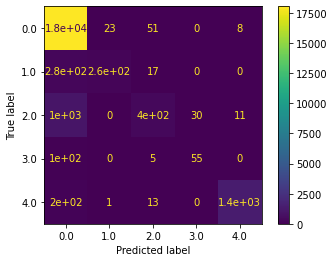

In [33]:
#Instatiate support vector machine model
model2a = SVC(kernel='linear')
#Support vector machine model results
model_results(model2a)

####3.GradientBoosting model

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.93      0.58      0.72       556
         2.0       0.95      0.82      0.88      1448
         3.0       0.70      0.49      0.58       162
         4.0       0.98      0.92      0.95      1608

    accuracy                           0.96     21892
   macro avg       0.91      0.76      0.82     21892
weighted avg       0.96      0.96      0.96     21892



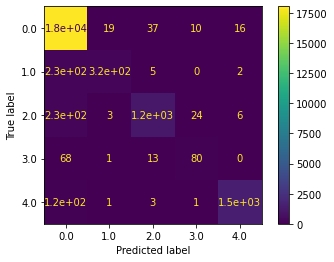

In [34]:
#Instatiate GradientBoosting model
model3 = GradientBoostingClassifier()
#GradientBoosting model results
model_results(model3)

####4.RandomForest model

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.98      0.61      0.75       556
         2.0       0.98      0.88      0.93      1448
         3.0       0.88      0.63      0.73       162
         4.0       0.99      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.81      0.87     21892
weighted avg       0.97      0.97      0.97     21892



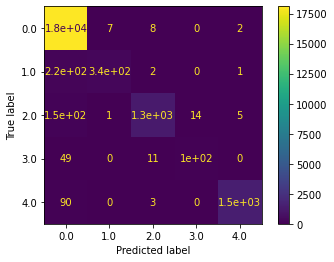

In [35]:
#Instatiate RandomForest model
model4 = RandomForestClassifier()
#RandomForest model results
model_results(model4)

####5.AdaBoostClassifier model

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93     18118
         1.0       0.49      0.04      0.07       556
         2.0       0.49      0.49      0.49      1448
         3.0       0.06      0.01      0.01       162
         4.0       0.77      0.61      0.68      1608

    accuracy                           0.87     21892
   macro avg       0.54      0.42      0.44     21892
weighted avg       0.85      0.87      0.85     21892



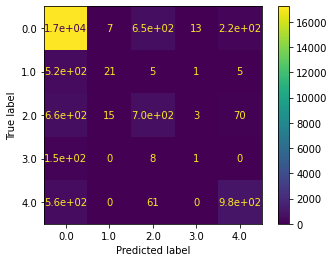

In [36]:
#Instatiate AdaBoostClassifier model
model5 = AdaBoostClassifier()
#AdaBoostClassifier model results
model_results(model5)

####6.Voting Classifier 

In [ ]:
#Classification Voting Ensemble: Predictions are the majority vote of contributing models.
#Hard Voting: Predict the class with the largest sum of votes from models
#Soft Voting. Predict the class with the largest summed probability from models.

from sklearn.ensemble import VotingClassifier
Voting_ensemble = VotingClassifier(estimators = [ ('lr',model1),('svmr',model2),('svml',model2a),('gb',model3),('rf',model4), ('ab',model5) ], voting = 'hard')
Voting_ensemble

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svmr',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,...
                                                     min_impurity_split=None,
                                

In [ ]:
# Fit the model with voting classifier
Voting_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svmr',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,...
                                                     min_impurity_split=None,
                                

In [ ]:
#Print voting classifier accuracy
print('Hard voting classifier accuracy: ',  Voting_ensemble.score(X_test,y_test))

Hard voting classifier accuracy:  0.9470582861319203


###**Comparing Different Machine Learning Models Results**

In [18]:
#Putting together results of all machine learning models for the comparison purpose
Logistic_Regression = [0.91,1530,289,37,360,272,965,40,118,67,212]
SVM_rbf = [0.97,621,32,12,245,43,174,26,84,6,148]
SVM_linear = [0.92,1580,82,24,297,86,1041,30,105,19,214]
Gradient_Boosting = [0.96,648,82,24,237,58,264,35,82,24,125]
Random_Forest = [0.97,504,17,8,223,24,170,14,60,8,93]
Ada_Boost = [0.87,1890,890,22,531,724,748,17,158,295,621]


In [19]:
results = pd.DataFrame([Logistic_Regression,SVM_rbf,SVM_linear,Gradient_Boosting,Random_Forest,Ada_Boost],
                             columns=['Accuracy','FalsePositives_Class0','FalseNegatives_Class0',
                                      'FalsePositives_Class1','FalseNegatives_Class1',
                                      'FalsePositives_Class2','FalseNegatives_Class2',
                                      'FalsePositives_Class3','FalseNegatives_Class3',
                                      'FalsePositives_Class4','FalseNegatives_Class4'
                                      ])
results.index = ['Logistic_Regression','SVM_rbf','SVM_linear','Gradient_Boosting','Random_Forest','Ada_Boost']
results.transpose()

,Logistic_Regression,SVM_rbf,SVM_linear,Gradient_Boosting,Random_Forest,Ada_Boost
Accuracy,0.91,0.97,0.92,0.96,0.97,0.87
FalsePositives_Class0,1530.00,621.00,1580.00,648.00,504.00,1890.00
FalseNegatives_Class0,289.00,32.00,82.00,82.00,17.00,890.00
FalsePositives_Class1,37.00,12.00,24.00,24.00,8.00,22.00
FalseNegatives_Class1,360.00,245.00,297.00,237.00,223.00,531.00
FalsePositives_Class2,272.00,43.00,86.00,58.00,24.00,724.00
FalseNegatives_Class2,965.00,174.00,1041.00,264.00,170.00,748.00
FalsePositives_Class3,40.00,26.00,30.00,35.00,14.00,17.00
FalseNegatives_Class3,118.00,84.00,105.00,82.00,60.00,158.00
FalsePositives_Class4,67.00,6.00,19.00,24.00,8.00,295.00


**Conclusion:** After obtaining accuracy and confusion matrix of all the models: Logistic regression, Support Vector machine, GradientBoosting, RandomForest, AdaBoost, Votingclassifer, can conclude that by looking at these metrics Random Forest model seems to be performing well on the given data. RandomForest might be a better apporach for Heart beat classification model. 

###Identify/ rank the important features(Optional)

In [ ]:
# what are the important features??
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification

# # Create the RFE object and compute a cross-validated score.
# model_rf = RandomForestClassifier()
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator=model_rf,
#     step=1,
#     cv=StratifiedKFold(2),
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
# )
# rfecv.fit(X_test, y_test)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.show()